In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv('JohnKeels.csv')
df.head()

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,DATE,PRICE HIGH,PRICE LOW,CLOSE PRICE,OPEN PRICE,TRADE VOLUME,SHARE VOLUME,TURNOVER
0,JKH,N,0,JKH,03-JAN-22,153.25,149.0,152.75,149.0,321,"799,594","121,924,661.25"
1,JKH,N,0,JKH,04-JAN-22,153.25,149.0,149.50,152.0,177,"317,312","47,828,319.50"
2,JKH,N,0,JKH,05-JAN-22,151.75,147.0,150.75,147.0,232,"1,557,752","234,256,848.25"
3,JKH,N,0,JKH,06-JAN-22,152.00,148.5,151.00,150.0,189,"318,537","47,954,694.75"
4,JKH,N,0,JKH,07-JAN-22,158.25,150.0,155.50,152.0,627,"3,343,693","512,681,468.50"


In [28]:
df.tail()

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,DATE,PRICE HIGH,PRICE LOW,CLOSE PRICE,OPEN PRICE,TRADE VOLUME,SHARE VOLUME,TURNOVER
468,JKH,N,0,JKH,21-Dec-23,190.50,188.5,190.25,190.00,62,"146,567","27,812,351.00"
469,JKH,N,0,JKH,22-Dec-23,190.75,189.0,189.00,190.00,86,"144,524","27,495,948.25"
470,JKH,N,0,JKH,27-Dec-23,191.75,187.5,191.50,188.75,71,"130,901","24,963,791.75"
471,JKH,N,0,JKH,28-Dec-23,192.00,190.0,191.50,190.00,57,"56,412","10,818,521.75"
472,JKH,N,0,JKH,29-Dec-23,192.00,190.0,191.00,192.00,106,"454,168","86,748,156.50"


In [29]:
df.isna().sum()

,0
COMPANY ID,0
MAIN TYPE,0
SUB TYPE,0
SHORT NAME,0
DATE,0
PRICE HIGH,0
PRICE LOW,3
CLOSE PRICE,0
OPEN PRICE,3
TRADE VOLUME,0


In [30]:
new_df = df.drop(df.columns[[0,1,2,3,9,11]], axis='columns')
new_df.head()

,DATE,PRICE HIGH,PRICE LOW,CLOSE PRICE,OPEN PRICE,SHARE VOLUME
0,03-JAN-22,153.25,149.0,152.75,149.0,"799,594"
1,04-JAN-22,153.25,149.0,149.50,152.0,"317,312"
2,05-JAN-22,151.75,147.0,150.75,147.0,"1,557,752"
3,06-JAN-22,152.00,148.5,151.00,150.0,"318,537"
4,07-JAN-22,158.25,150.0,155.50,152.0,"3,343,693"


In [31]:
new_df['DATE'] = pd.to_datetime(new_df['DATE'], format = '%d-%b-%y')
new_df.head()

,DATE,PRICE HIGH,PRICE LOW,CLOSE PRICE,OPEN PRICE,SHARE VOLUME
0,2022-01-03,153.25,149.0,152.75,149.0,"799,594"
1,2022-01-04,153.25,149.0,149.50,152.0,"317,312"
2,2022-01-05,151.75,147.0,150.75,147.0,"1,557,752"
3,2022-01-06,152.00,148.5,151.00,150.0,"318,537"
4,2022-01-07,158.25,150.0,155.50,152.0,"3,343,693"


In [32]:
df = new_df.set_index('DATE')
df.head()


,PRICE HIGH,PRICE LOW,CLOSE PRICE,OPEN PRICE,SHARE VOLUME
DATE,,,,,
2022-01-03,153.25,149.0,152.75,149.0,"799,594"
2022-01-04,153.25,149.0,149.50,152.0,"317,312"
2022-01-05,151.75,147.0,150.75,147.0,"1,557,752"
2022-01-06,152.00,148.5,151.00,150.0,"318,537"
2022-01-07,158.25,150.0,155.50,152.0,"3,343,693"


In [33]:
ma_100_days = df['CLOSE PRICE'].rolling(50).mean()

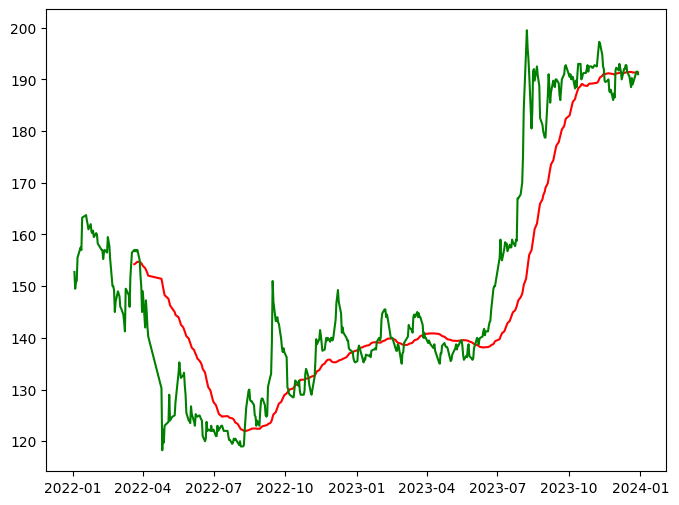

In [34]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(df['CLOSE PRICE'], 'g')
plt.show()

In [35]:
df.isna().sum()

,0
PRICE HIGH,0
PRICE LOW,3
CLOSE PRICE,0
OPEN PRICE,3
SHARE VOLUME,0


In [36]:
df.dropna(inplace=True)

In [37]:
df_train = pd.DataFrame(df['CLOSE PRICE'][0: int(len(df)*0.80)])

In [38]:
df_test = pd.DataFrame(df['CLOSE PRICE'][int(len(df)*0.8) : len(df)])

In [39]:
len(df)*0.8

376.0

In [40]:
df_train.shape

(376, 1)

In [41]:
df_test.shape

(94, 1)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [43]:
df_train_scaled = scaler.fit_transform(df_train)


In [44]:
x =[]
y=[]

for i in range(50, df_train_scaled.shape[0]):
  x.append(df_train_scaled[i-50:i])
  y.append(df_train_scaled[i,0])



In [47]:
x, y = np.array(x), np.array(y)

In [48]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [50]:
model= Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
               input_shape = ((x.shape[1],1)) ))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation ='relu', return_sequences = True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation ='relu', return_sequences = True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [51]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [52]:
model.fit(x,y, epochs =50, batch_size=32, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0663
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0229
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0163
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0201
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0168
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0150
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0154
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0144
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0108
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0118
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0100
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0113
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0112
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0117
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - lo

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [55]:
past_100_days= df_train.tail(100)

In [56]:
data_test = pd.concat([past_100_days, df_test], ignore_index=True)

In [57]:
data_test.shape

(194, 1)

In [58]:
data_test_scale = scaler.fit_transform(data_test)

In [59]:
x =[]
y=[]

for i in range(50, data_test_scale.shape[0]):
  x.append(data_test_scale[i-50:i])
  y.append(data_test_scale[i,0])

In [60]:
x,y = np.array(x), np.array(y)

In [61]:
y_predict = model.predict(x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


In [62]:
y_predict

array([[0.06637815],
       [0.06628579],
       [0.06617259],
       [0.06603757],
       [0.06588247],
       [0.0657213 ],
       [0.06557075],
       [0.06547168],
       [0.06546256],
       [0.06555124],
       [0.06576318],
       [0.0661314 ],
       [0.0667192 ],
       [0.06763348],
       [0.06904988],
       [0.07097688],
       [0.07337836],
       [0.07613692],
       [0.07930629],
       [0.08307818],
       [0.08765285],
       [0.09373289],
       [0.10296081],
       [0.11657963],
       [0.13392824],
       [0.15514052],
       [0.18089089],
       [0.20956054],
       [0.23829186],
       [0.2652526 ],
       [0.28963572],
       [0.31060752],
       [0.32759035],
       [0.33936408],
       [0.34618875],
       [0.34859592],
       [0.34748575],
       [0.34483746],
       [0.34183922],
       [0.3386743 ],
       [0.336098  ],
       [0.33440283],
       [0.3382655 ],
       [0.35012233],
       [0.37008372],
       [0.3975023 ],
       [0.43329722],
       [0.482

In [64]:
scale = 1/scaler.scale_
scale

array([64.5])

In [65]:
y_predict = y_predict*scale

In [66]:
y = y*scale

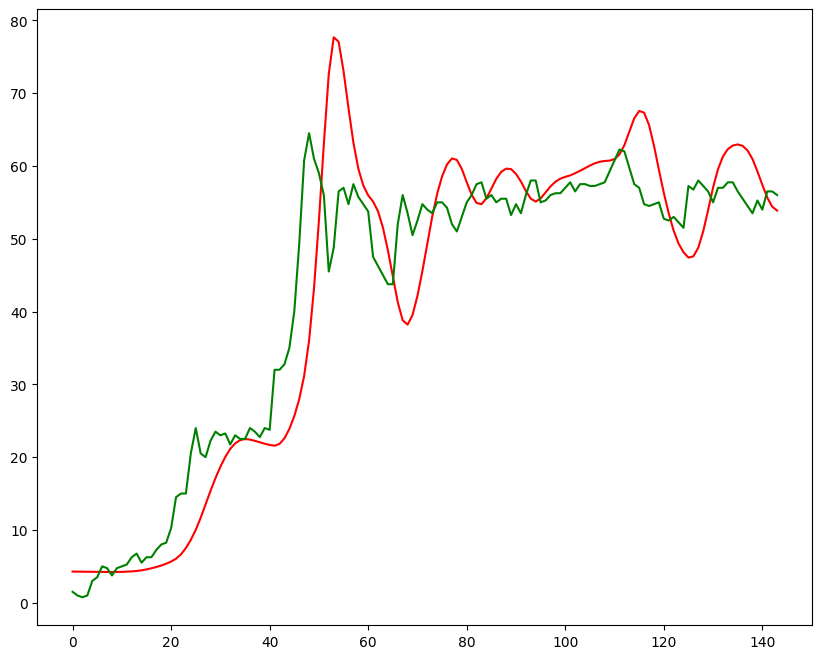

In [68]:
plt.figure(figsize= (10,8))
plt.plot(y_predict, 'r', label = 'predicted price')
plt.plot(y, 'g', label='actual price')
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(y, y_predict))
print("Test RMSE:", rmse)

Test RMSE: 8.113277009080818


In [73]:
model.save('Stock Predictions Model.keras')